In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv(r"C:\Users\DIGITS\Downloads\archive\archive\Wine_Dataset.csv")
#this displays the basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Malic acid            178 non-null    float64
 1   Ashe                  178 non-null    float64
 2   Alcalinity of ashe    178 non-null    float64
 3   Magnesium             178 non-null    float64
 4   Total phenols         178 non-null    int64  
 5   Flavanoidse           178 non-null    float64
 6   Nonflavanoid phenols  178 non-null    float64
 7   Proanthocyanins       178 non-null    float64
 8   Color intensity       178 non-null    float64
 9   OD280                 178 non-null    float64
 10  OD31                  178 non-null    float64
 11  Proline               178 non-null    float64
 12  Alcohol               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


In [5]:
# Display the first few rows
print(df.head())

   Malic acid  Ashe  Alcalinity of ashe  Magnesium  Total phenols  \
0       14.23  1.71                2.43       15.6            127   
1       13.20  1.78                2.14       11.2            100   
2       13.16  2.36                2.67       18.6            101   
3       14.37  1.95                2.50       16.8            113   
4       13.24  2.59                2.87       21.0            118   

   Flavanoidse  Nonflavanoid phenols  Proanthocyanins  Color intensity  OD280  \
0         2.80                  3.06             0.28             2.29   5.64   
1         2.65                  2.76             0.26             1.28   4.38   
2         2.80                  3.24             0.30             2.81   5.68   
3         3.85                  3.49             0.24             2.18   7.80   
4         2.80                  2.69             0.39             1.82   4.32   

   OD31  Proline  Alcohol  
0  1.04     3.92        1  
1  1.05     3.40        1  
2  1.03     3.

In [6]:
# Display the data types
print(df.dtypes)


Malic acid              float64
Ashe                    float64
Alcalinity of ashe      float64
Magnesium               float64
Total phenols             int64
Flavanoidse             float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
OD280                   float64
OD31                    float64
Proline                 float64
Alcohol                   int64
dtype: object


In [7]:
# Check for missing values
print(df.isnull().sum())

Malic acid              0
Ashe                    0
Alcalinity of ashe      0
Magnesium               0
Total phenols           0
Flavanoidse             0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
OD280                   0
OD31                    0
Proline                 0
Alcohol                 0
dtype: int64


In [10]:
# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

Number of duplicates: 0


In [11]:
# Check for outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
Malic acid              0
Ashe                    3
Alcalinity of ashe      3
Magnesium               4
Total phenols           4
Flavanoidse             0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         2
OD280                   4
OD31                    1
Proline                 0
Alcohol                 0
dtype: int64


In [12]:
# Check for missing values, including NaN
print("Missing values (including NaN):")
print(df.isna().sum())

Missing values (including NaN):
Malic acid              0
Ashe                    0
Alcalinity of ashe      0
Magnesium               0
Total phenols           0
Flavanoidse             0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
OD280                   0
OD31                    0
Proline                 0
Alcohol                 0
dtype: int64


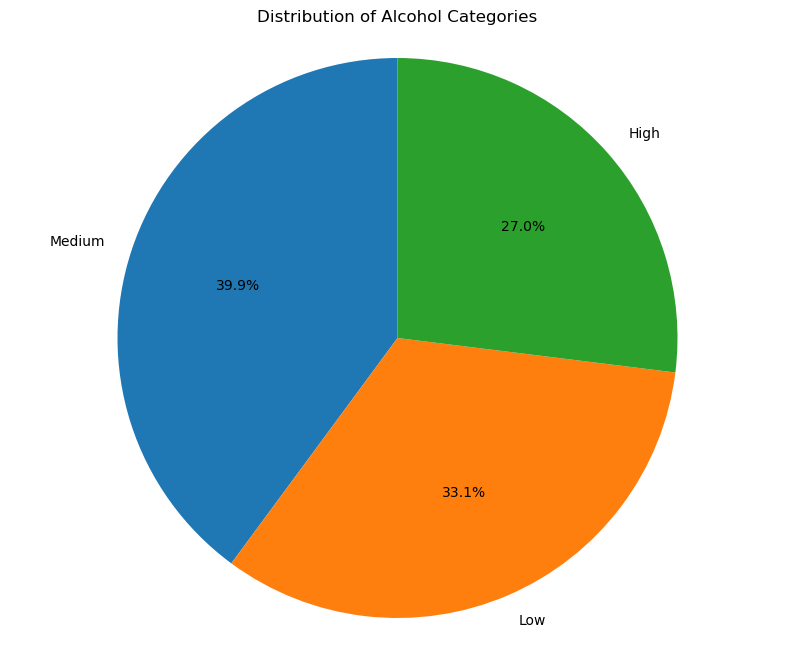

In [23]:
# 1. Pie Chart
plt.figure(figsize=(10, 8))
alcohol_categories = df['Alcohol_Category'].value_counts()
plt.pie(alcohol_categories.values, labels=alcohol_categories.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Alcohol Categories')
plt.axis('equal')
plt.show()


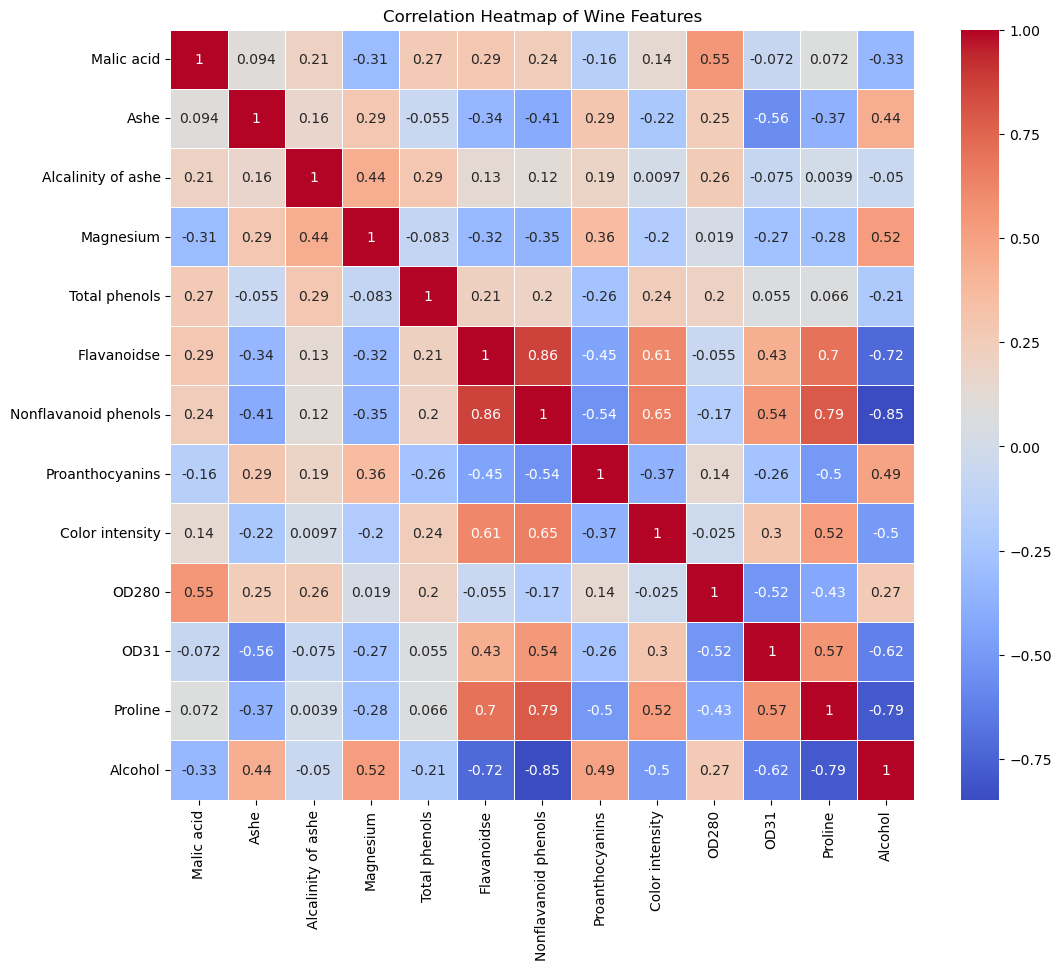

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

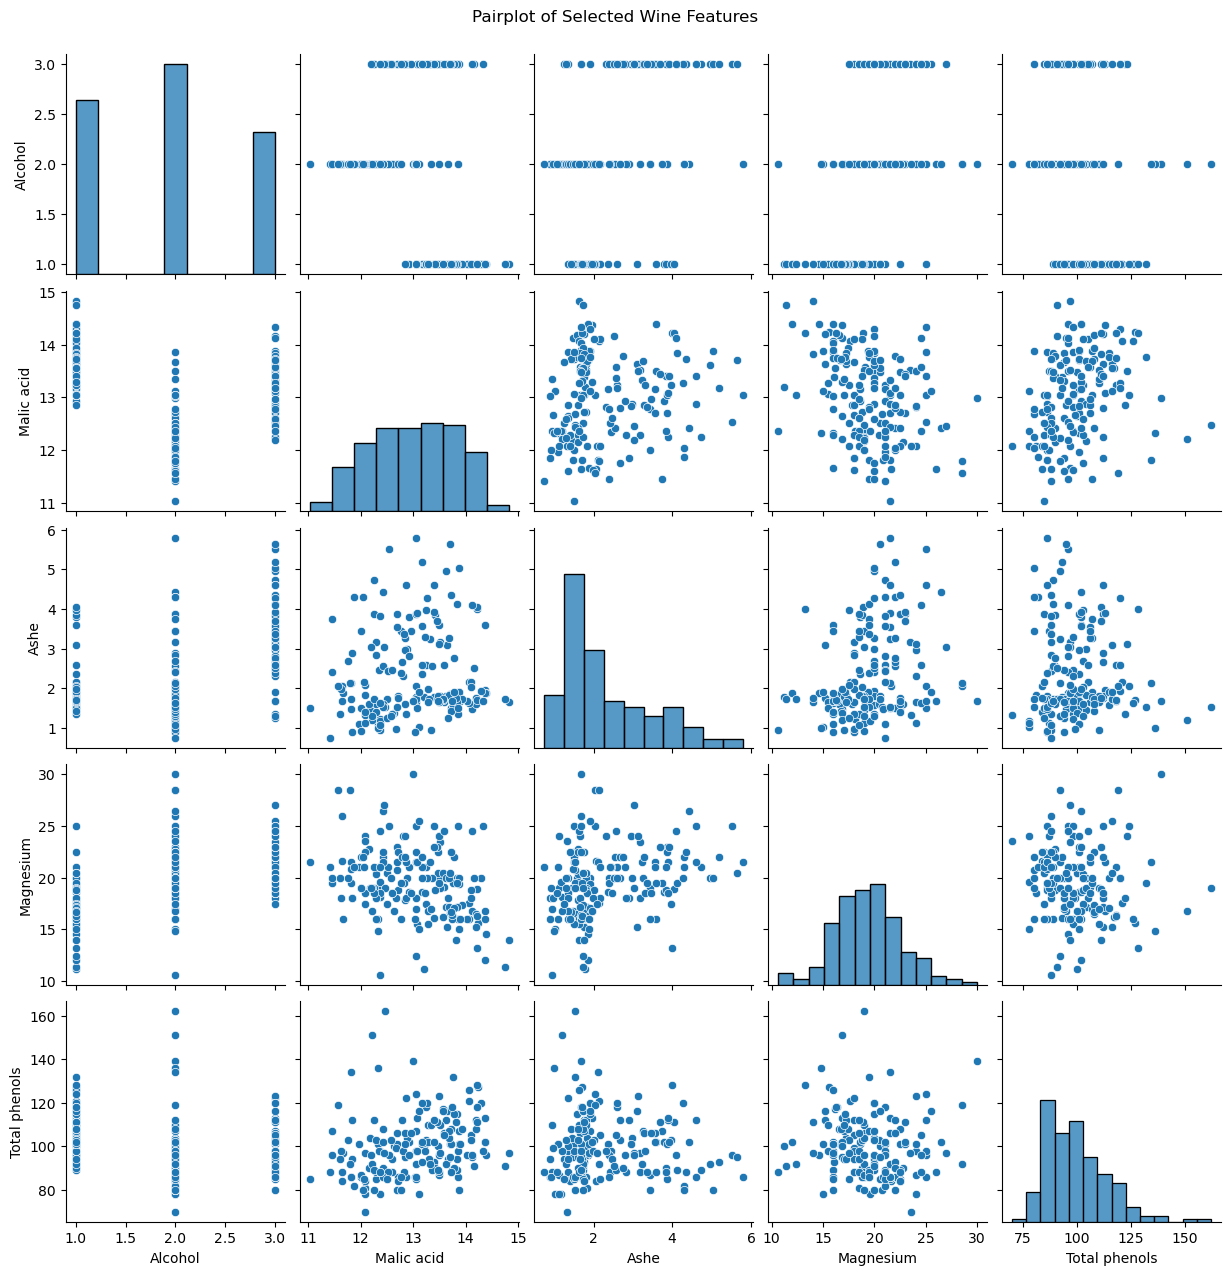

In [16]:
# Pairplot for selected features
selected_features = ['Alcohol', 'Malic acid', 'Ashe', 'Magnesium', 'Total phenols']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Wine Features', y=1.02)
plt.show()

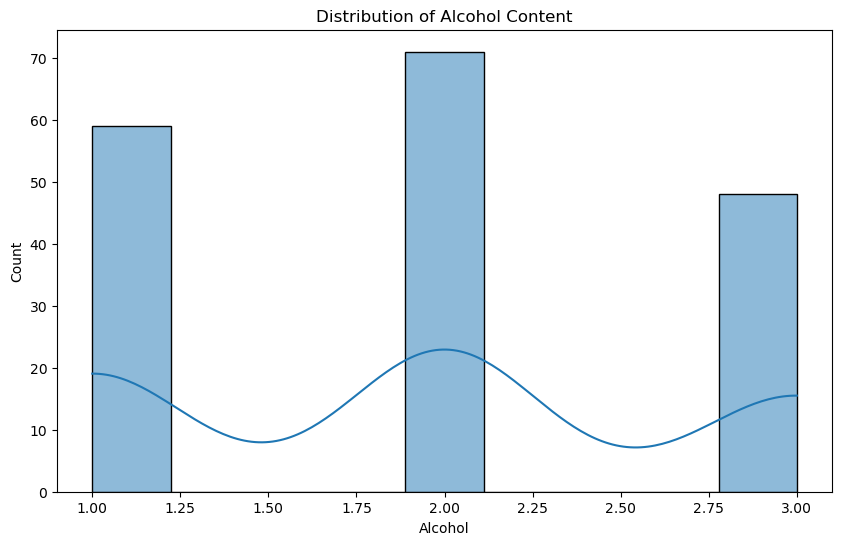

In [17]:
# Distribution of Alcohol content
plt.figure(figsize=(10, 6))
sns.histplot(df['Alcohol'], kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Total Phenols')

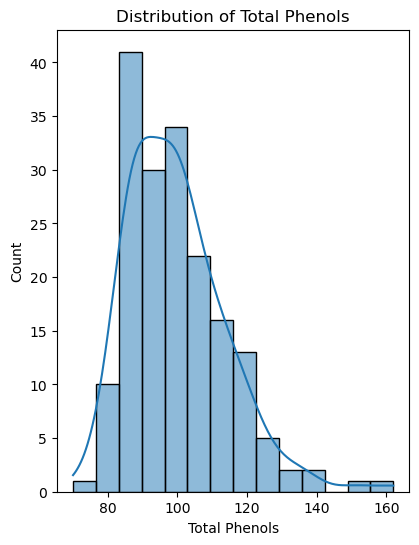

In [27]:
# Total phenols
plt.figure(figsize=(10, 6))
plt.subplot(122)
sns.histplot(df['Total phenols'], kde=True)
plt.title('Distribution of Total Phenols')
plt.xlabel('Total Phenols')

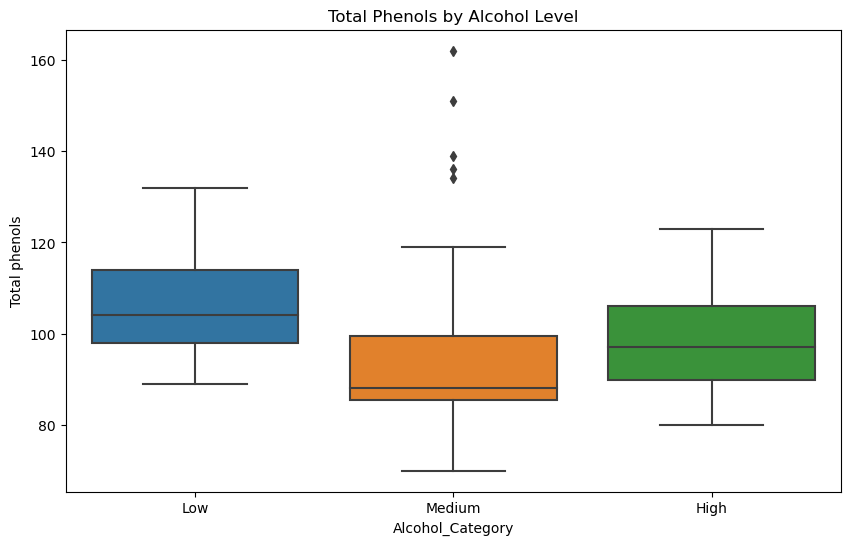

In [20]:
# Box plot of Total phenols by Alcohol level
df['Alcohol_Category'] = pd.cut(df['Alcohol'], bins=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alcohol_Category', y='Total phenols', data=df)
plt.title('Total Phenols by Alcohol Level')
plt.show()

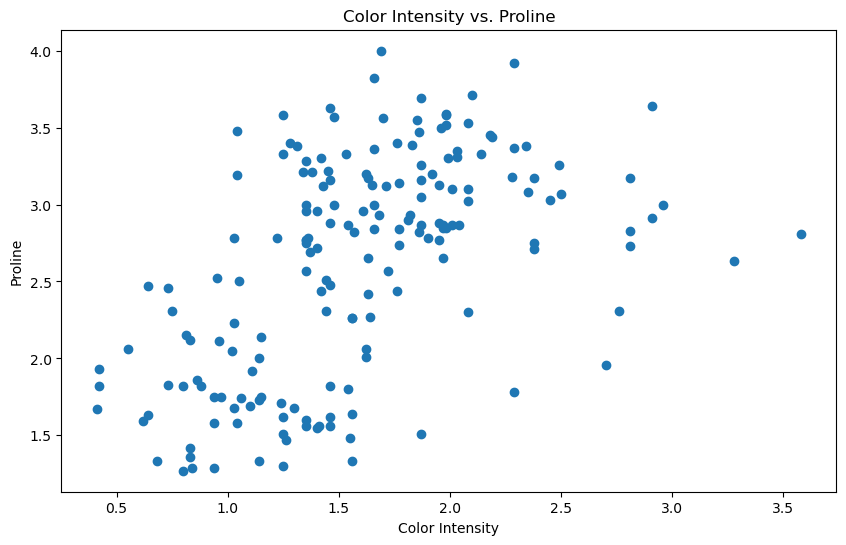

In [22]:
# Scatter plot of Color intensity vs. Proline
plt.figure(figsize=(10, 6))
plt.scatter(df['Color intensity'], df['Proline'])
plt.title('Color Intensity vs. Proline')
plt.xlabel('Color Intensity')
plt.ylabel('Proline')
plt.show()

In [28]:
# Assuming 'Alcohol' as the target variable (you may change this based on your specific goal)
X = df.drop(['Alcohol', 'Alcohol_Category'], axis=1)
y = df['Alcohol']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
